In [2]:
pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 33.0 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=337979137cefe70206a7c30b455edd624ccfc049b70e2edaf75a5d5eb0abeb40
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [3]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, cross_validate, KFold, train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import openml

First we load data and check them

In [4]:
dataset = openml.datasets.get_dataset(1185)
wine, target, _, attribute_names = dataset.get_data(target=dataset.default_target_attribute)

print(wine.head())
print(target.head())

     Alcohol  Malic_acid       Ash  Alcalinity_of_ash   Magnesium  \
0  13.761443    0.972960  2.191146          14.349954  106.525734   
1  11.897923    1.297780  2.199666          17.478054  104.205421   
2  12.659632    1.748552  2.438597          21.584696   88.079451   
3  13.054828    1.817559  1.893926          15.390157  108.589893   
4  11.769431    3.017528  3.013448          17.081528   86.525235   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       2.288580    2.584551              0.418044         1.862804   
1       2.716657    1.855066              0.318077         1.029640   
2       1.919476    0.681341              0.538078         1.327974   
3       2.662509    2.815723              0.278535         1.473812   
4       2.224963    0.846229              0.286065         1.644007   

   Color_intensity       Hue  OD280%2FOD315_of_diluted_wines     Proline  
0         3.086808  1.169861                        2.819086  850.678431  
1       

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 13 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Alcohol                         1000000 non-null  float64
 1   Malic_acid                      1000000 non-null  float64
 2   Ash                             1000000 non-null  float64
 3   Alcalinity_of_ash               1000000 non-null  float64
 4   Magnesium                       1000000 non-null  float64
 5   Total_phenols                   1000000 non-null  float64
 6   Flavanoids                      1000000 non-null  float64
 7   Nonflavanoid_phenols            1000000 non-null  float64
 8   Proanthocyanins                 1000000 non-null  float64
 9   Color_intensity                 1000000 non-null  float64
 10  Hue                             1000000 non-null  float64
 11  OD280%2FOD315_of_diluted_wines  1000000 non-null  float64
 12  P

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic_acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity_of_ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total_phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color_intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280%2FOD315_of_diluted_wines'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

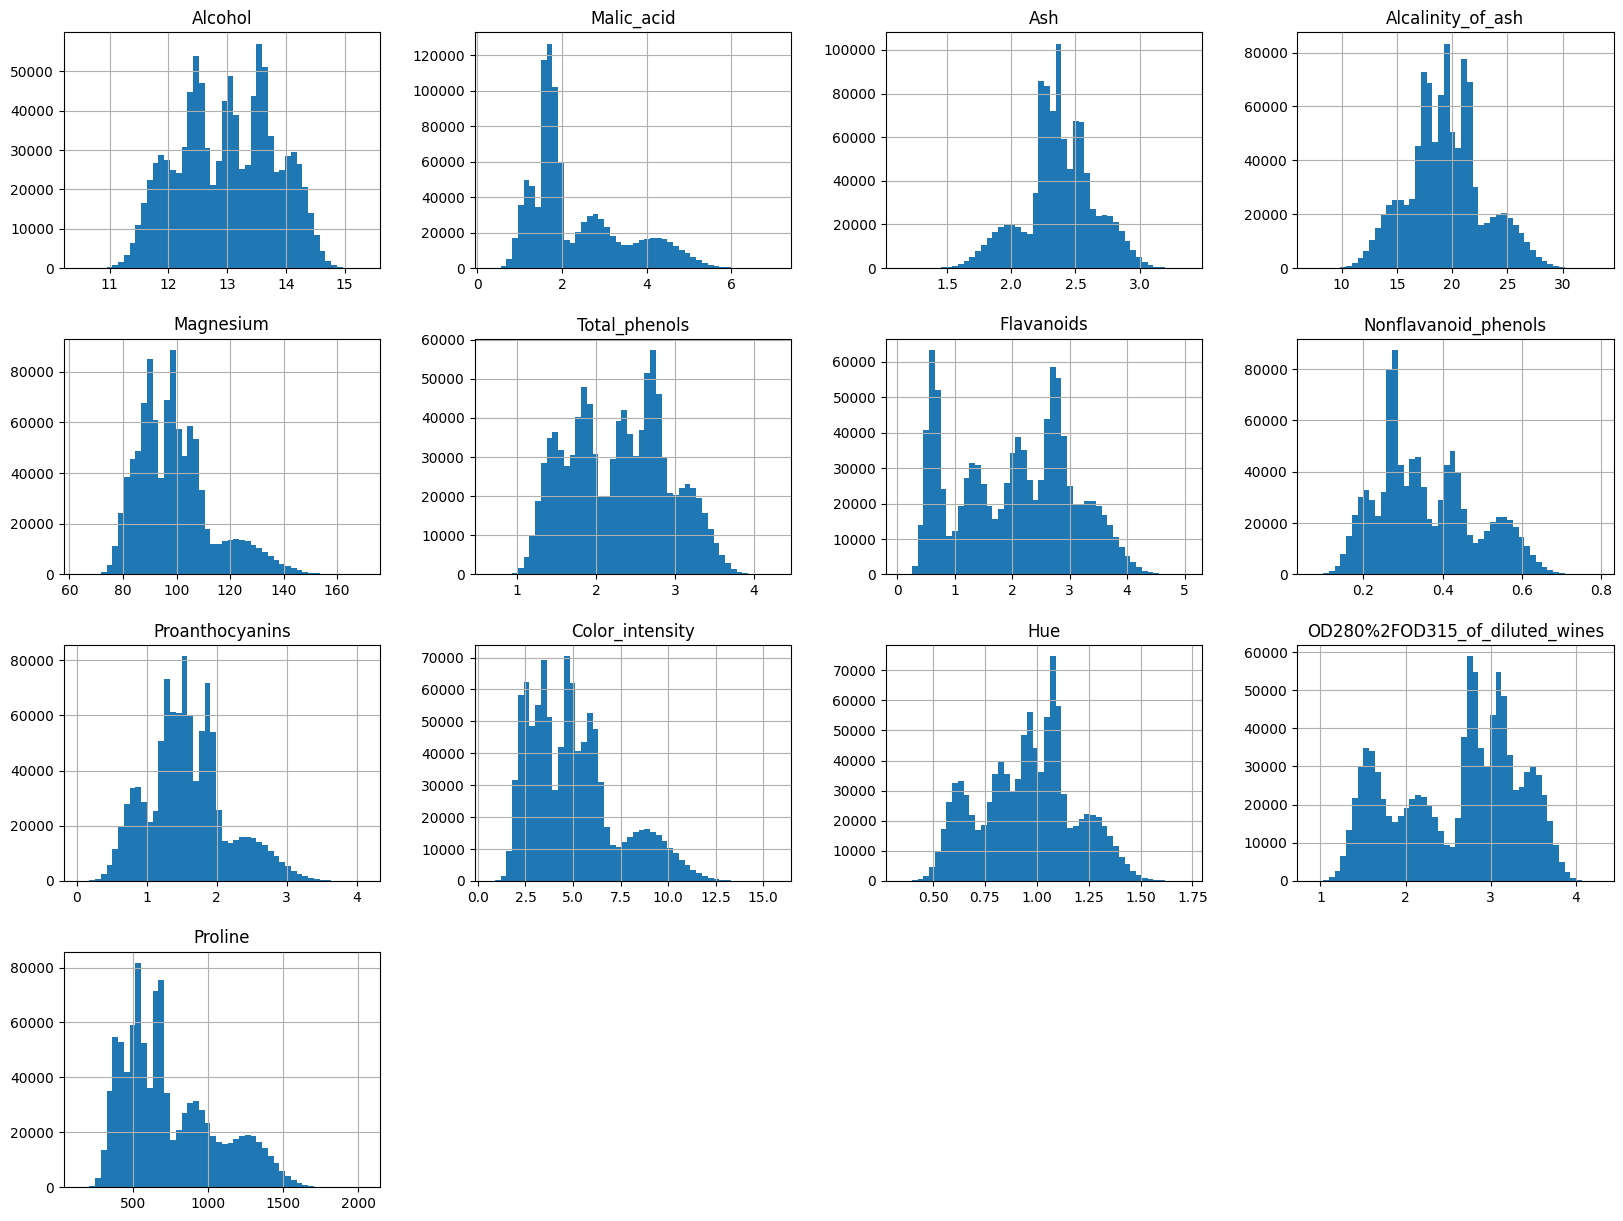

In [ ]:
wine.hist(bins=50, figsize=(20,15))


In [ ]:
Variance = wine.var()
Mean = wine.mean()
print(Variance/Mean)

Alcohol                             0.050870
Malic_acid                          0.532304
Ash                                 0.031751
Alcalinity_of_ash                   0.589050
Magnesium                           2.030285
Total_phenols                       0.169159
Flavanoids                          0.487686
Nonflavanoid_phenols                0.042737
Proanthocyanins                     0.203935
Color_intensity                     1.058530
Hue                                 0.053939
OD280%2FOD315_of_diluted_wines      0.190965
Proline                           132.428955
dtype: float64


In [ ]:
print(wine.describe())

              Alcohol      Malic_acid             Ash  Alcalinity_of_ash  \
count  1000000.000000  1000000.000000  1000000.000000     1000000.000000   
mean        12.997213        2.329891        2.373741          19.487263   
std          0.813119        1.113648        0.274533           3.388063   
min         10.458039        0.278113        1.134086           7.298736   
25%         12.378810        1.591496        2.237575          17.369753   
50%         13.022848        1.863147        2.369370          19.393546   
75%         13.626555        2.958346        2.543774          21.438955   
max         15.357436        7.075011        3.378410          33.310360   

            Magnesium   Total_phenols      Flavanoids  Nonflavanoid_phenols  \
count  1000000.000000  1000000.000000  1000000.000000        1000000.000000   
mean        99.537938        2.296954        2.053340              0.359970   
std         14.215849        0.623339        1.000693              0.124032   

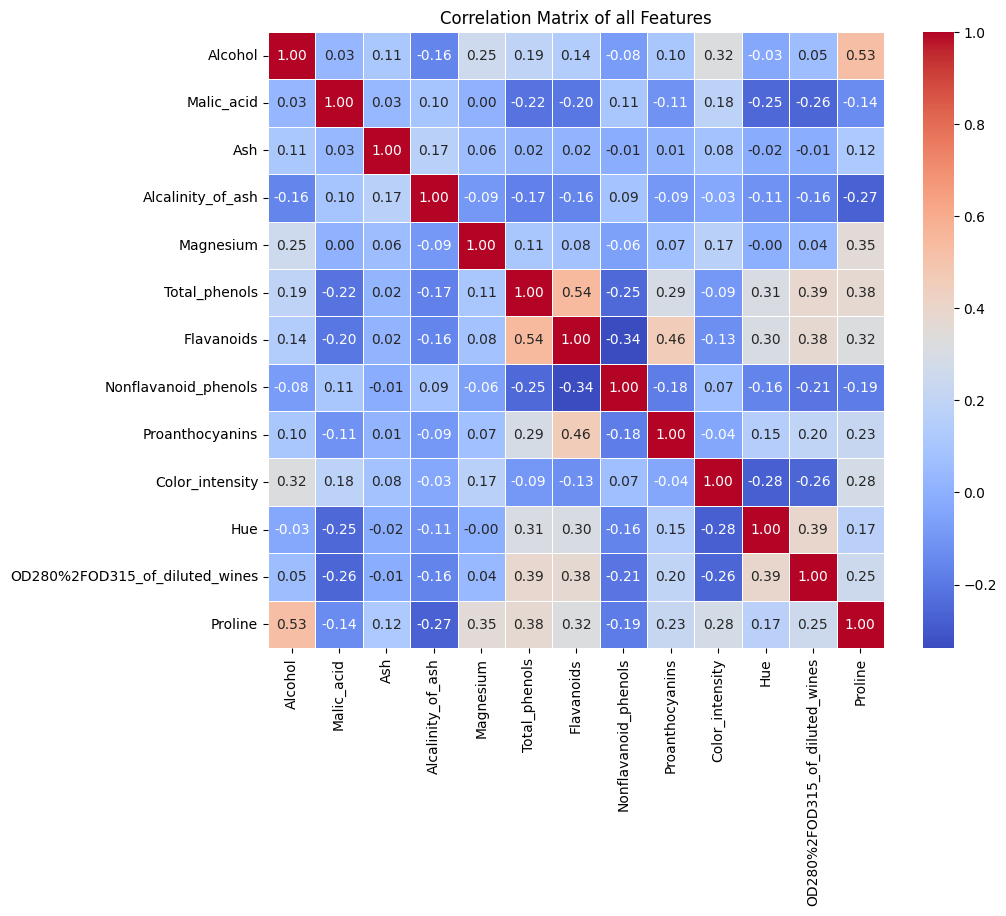

In [ ]:
# Compute correlation matrix
corr_matrix = wine.corr()

# Display the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,          # show numbers in cells
    fmt=".2f",           # 2 decimal places
    cmap="coolwarm",     # red = positive, blue = negative
    linewidths=0.5,      # lines between cells
    square=True
)

plt.title("Correlation Matrix of all Features")
plt.show()


First model: classic logistic regression

In [ ]:
X = wine.copy()
y = target.copy()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000)) # we can change the max_iter
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f"Average 10-Fold CV Score: {cv_scores.mean():.3f}")

We have a result score of 0.928 (either with 1000 and 2000 max_iter) : it is a good score. But we have to check how the model predicts data with the confusion matrix and other metrics

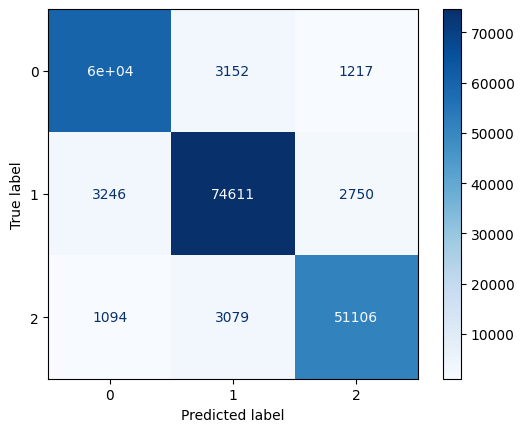

In [ ]:
# We create our confusion matrix and display it
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)


<Axes: >

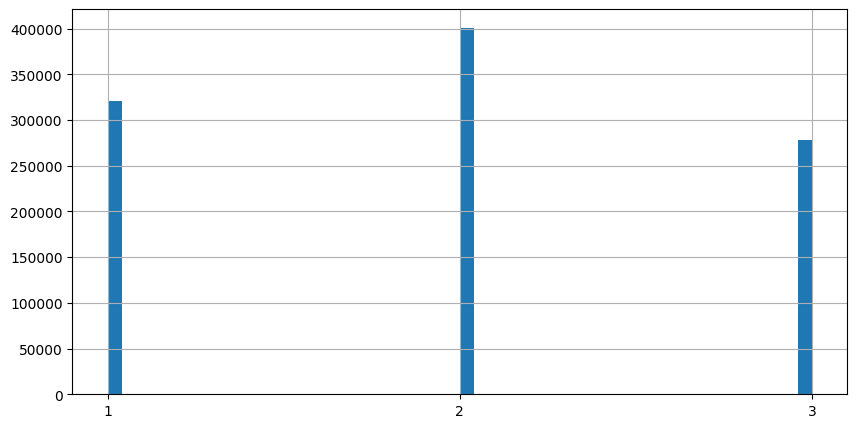

In [ ]:
y.hist(bins=50, figsize=(10,5))

In [ ]:
# We calculte the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.927


The confusion matrix show that our model is good and the accuracy score confirms that (0.927)

We can try another model (OneVsRestClassifier) first with penalty defined by l1 and see which feature is the most important

1e-07
1.4873521072935117e-07
2.2122162910704503e-07
3.290344562312671e-07
4.893900918477499e-07
7.278953843983146e-07
1.0826367338740541e-06
1.6102620275609392e-06
2.395026619987486e-06
3.562247890262444e-06
5.298316906283713e-06
7.880462815669904e-06
1.1721022975334793e-05
1.7433288221999873e-05
2.592943797404667e-05
3.856620421163472e-05
5.736152510448681e-05
8.531678524172815e-05
0.00012689610031679235
0.00018873918221350977
0.00028072162039411786
0.00041753189365604046
0.0006210169418915617
0.0009236708571873865
0.0013738237958832637
0.002043359717856944
0.0030391953823132012
0.0045203536563602495
0.006723357536499335
0.01


/tmp/ipython-input-1914735010.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", n_features)
/tmp/ipython-input-1914735010.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')


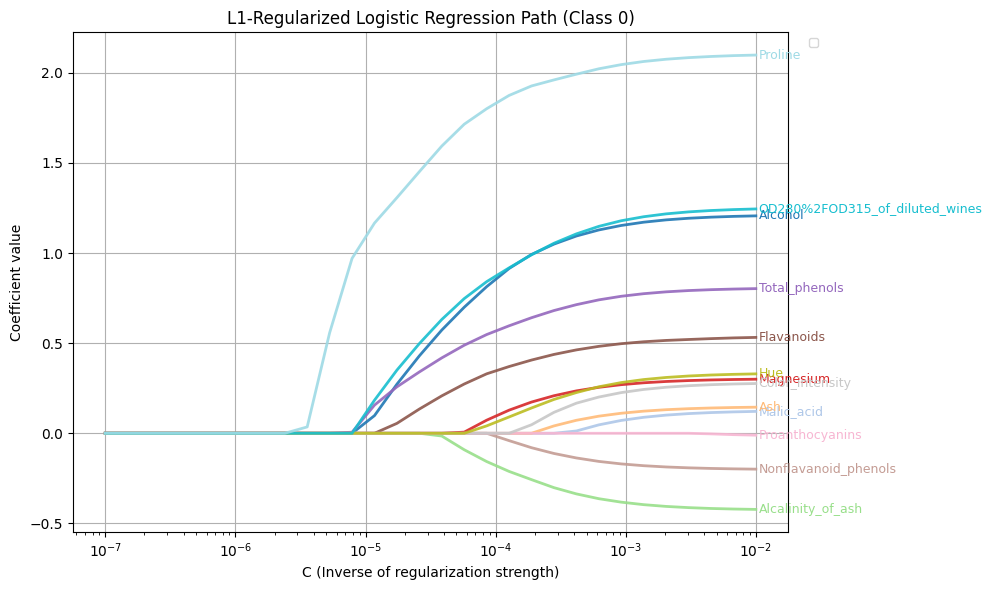

In [ ]:
X = wine.copy()
y = target.copy()

# We split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Regularization path
Cs = np.logspace(-6, -2, 30)
coefs = []

for C in Cs:
    clf = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", OneVsRestClassifier(
            LogisticRegression(
                penalty="l1", solver="saga", max_iter=1000, C=C, tol=1e-4
            )
        ))
    ])
    clf.fit(X_train, y_train)

    # Collect coefficients for each class
    coef_matrix = np.vstack([est.coef_.ravel() for est in clf.named_steps["classifier"].estimators_])
    coefs.append(coef_matrix)

coefs = np.array(coefs)  # shape = (n_Cs, n_classes, n_features)
n_features = coefs.shape[2]
colors = cm.get_cmap("tab20", n_features)

# Plot regularization path
plt.figure(figsize=(10, 6))

# Choose one class for clarity
class_idx = 0
for feat_idx, feat_name in enumerate(attribute_names):
    color = colors(feat_idx)
    plt.plot(Cs, coefs[:, class_idx, feat_idx], color=color, lw=2, alpha=0.9)
    # Add label near the end of the curve
    plt.text(
        Cs[-1] * 1.05,
        coefs[-1, class_idx, feat_idx],
        feat_name,
        fontsize=9,
        color=color,
        va='center'
    )
plt.xscale('log')
plt.xlabel("C (Inverse of regularization strength)")
plt.ylabel("Coefficient value")
plt.title(f"L1-Regularized Logistic Regression Path (Class {class_idx})")
plt.grid(True)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), fontsize='small')
plt.tight_layout()
plt.show()


We can see that the least important features are Proanthocyanins, Malic_acid, Ash, Nonflavanoid_phenols, Color_intensity, Magnesium, Hue.
We can try to exclude them to have a cleaner result

In [ ]:
# We exclude least important features
exclude = ["Proanthocyanins", "Malic_acid", "Ash", "Nonflavanoid_phenols", "Color_intensity", "Magnesium", "Hue"]
X = wine.copy()
X_reduced = X.drop(columns=exclude)
X_reduced.head()
y = target.copy()

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

# Create the model pipeline
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_reduced, y, cv=cv, scoring='accuracy')
print(f"Average 10-Fold CV Score: {cv_scores.mean():.3f}")


Average 10-Fold CV Score: 0.871


We have now a score of 0.871 that is less than with all the features (0.928). We can try to exclude less important features one by one

Excluding 0 features: CV mean score = 0.928
Excluding 1 features: CV mean score = 0.908
Excluding 2 features: CV mean score = 0.908
Excluding 3 features: CV mean score = 0.905
Excluding 4 features: CV mean score = 0.903
Excluding 5 features: CV mean score = 0.880
Excluding 6 features: CV mean score = 0.868
Excluding 7 features: CV mean score = 0.855
Excluding 8 features: CV mean score = 0.854


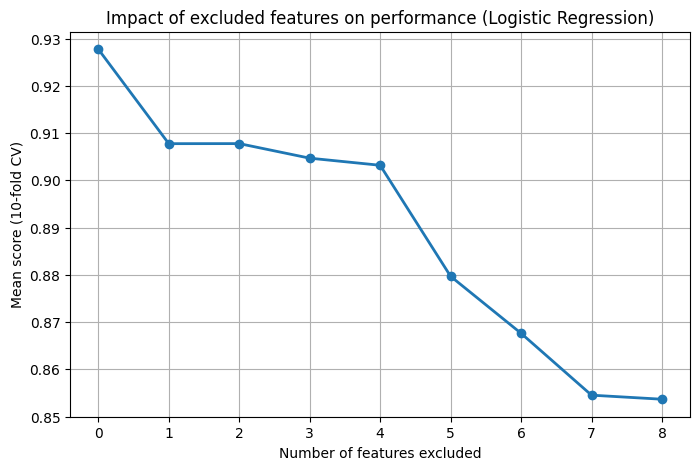

In [ ]:
# We have the same features to exclude by importan
exclude = ["Color_intensity", "Proanthocyanins", "Flavanoids", "Magnesium",
           "Hue", "Total_phenols", "Malic_acid", "Ash"]

X = wine.copy()
y = target.copy()

# Initialization
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_means = []

# We exclude 0 to all excluded features in importance order
for i in range(len(exclude) + 1):
    X_reduced = X.drop(columns=exclude[:i]) if i > 0 else X.copy()

    # We create our pipeline
    pipeline = Pipeline([
        ("scaler", MinMaxScaler()),
        ("classifier", LogisticRegression(max_iter=1000))
    ])

    # We get the score
    cv_scores = cross_val_score(pipeline, X_reduced, y, cv=cv, scoring='accuracy')
    cv_means.append(cv_scores.mean())
    print(f"Excluding {i} features: CV mean score = {cv_scores.mean():.3f}")

# We can now display the score depending on the number of features excluded
plt.figure(figsize=(8, 5))
plt.plot(range(len(exclude) + 1), cv_means, marker='o', linestyle='-', linewidth=2)
plt.title("Impact of excluded features on performance (Logistic Regression)")
plt.xlabel("Number of features excluded")
plt.ylabel("Mean score (10-fold CV)")
plt.xticks(range(len(exclude) + 1))
plt.grid(True)
plt.show()




We can see that more we exclude features and worse is the score (0.928 to 0.854). We need to keep all these features currently.

We can try with a stochastic gradient descent classifier

In [ ]:
# Stochastic Gradient Descent Classifier (SGDClassifier)

X = wine.copy()
y= target.copy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

sgd_clf = SGDClassifier(
    loss='log_loss',      # logistic regression (softmax)
    learning_rate='optimal',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

sgd_clf.fit(X_train, y_train)   # works with multiclass labels (One-vs-Rest)
y_pred = sgd_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SGD Classifier Accuracy: {accuracy:.3f}")

cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_full = cross_val_score(sgd_clf, X_scaled, y, cv=cv, scoring='accuracy')
print(f"SGD Classifier Average 10-Fold CV Score (All features): {cv_scores_full.mean():.3f}")

SGD Classifier Accuracy: 0.927
SGD Classifier Average 10-Fold CV Score (All features): 0.927


We have a score that is lightly worse than our first model. We can try a model with ridge regularization instead.

In [ ]:
X = wine.copy()
y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ridge Regularization with Logistic Regression
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classifier", LogisticRegression(max_iter=1000, penalty='l2'))
])
pipeline.fit(X_train, y_train)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_ridge = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f"Ridge Logistic Regression Average 10-Fold CV Score: {cv_scores_ridge.mean():.3f}")

Ridge Logistic Regression Average 10-Fold CV Score: 0.928


With this model, we have a score that is as good as our first model. We can try with Lasso Regularization in a new model.

In [ ]:
X = wine.copy()
y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Lasso Regularization with Logistic Regression
pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classifier", LogisticRegression(max_iter=1000, penalty='l1', solver='saga'))
])
pipeline.fit(X_train, y_train)
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_lasso = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f"Lasso Logistic Regression Average 10-Fold CV Score: {cv_scores_lasso.mean():.3f}")

Lasso Logistic Regression Average 10-Fold CV Score: 0.928


We find another time a score that is the same as our first model

We can try a decision tree. But to know which max_depth to choose we can do a bit of fine tuning on this hyper-parameter.

Training Decision Tree with max_depth=1
Training Decision Tree with max_depth=2
Training Decision Tree with max_depth=3
Training Decision Tree with max_depth=4
Training Decision Tree with max_depth=5
Training Decision Tree with max_depth=6
Training Decision Tree with max_depth=7
Training Decision Tree with max_depth=8
Training Decision Tree with max_depth=9
Training Decision Tree with max_depth=10
Training Decision Tree with max_depth=11
Training Decision Tree with max_depth=12
Training Decision Tree with max_depth=13
Training Decision Tree with max_depth=14
Training Decision Tree with max_depth=15
Training Decision Tree with max_depth=16
Training Decision Tree with max_depth=17
Training Decision Tree with max_depth=18
Training Decision Tree with max_depth=19
Training Decision Tree with max_depth=20


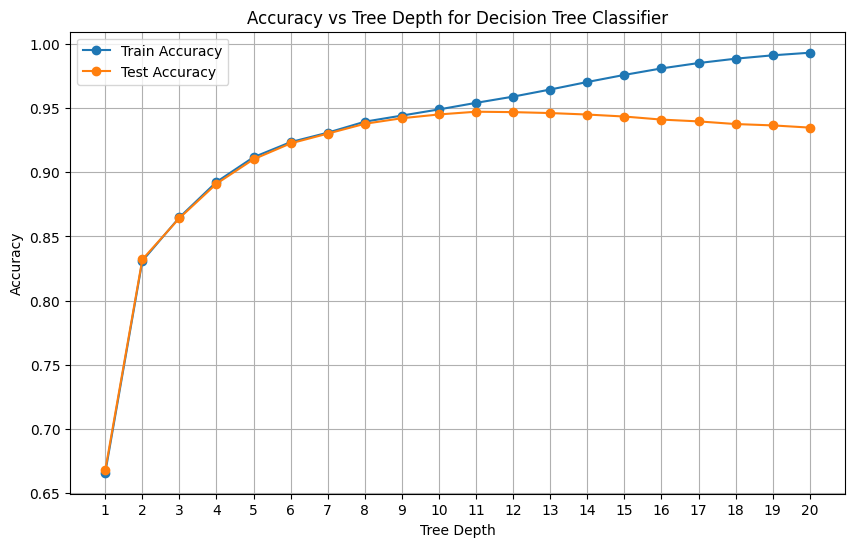

In [5]:
X = wine.copy()
y = target.copy()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store accuracies
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

# Iterate over tree depths
for depth in depths:
    print(f"Training Decision Tree with max_depth={depth}")
    # Create pipeline with current depth
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', DecisionTreeClassifier(
            max_depth=depth,
            criterion='gini',
            random_state=42
        ))
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Predict and calculate accuracy for training and test sets
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth for Decision Tree Classifier')
plt.legend()
plt.grid(True)
plt.xticks(depths)
plt.show()

We can see that the best test result is obtained for max_depth = 11, and beyond this the model overfits so the training sets'results improve and not the test ones.

In [6]:
X = wine.copy()
y = target.copy()

print("Training Decision Tree with max_depth=11")
# Create pipeline with current depth
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', DecisionTreeClassifier(
        max_depth=11,
        criterion='gini',
        random_state=42
    ))
])

# Train the pipeline
pipeline.fit(X, y)

# CV scores
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores_tree = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
print(f"Decision Tree Classifier Average 10-Fold CV Score: {cv_scores_tree.mean():.3f}")

Training Decision Tree with max_depth=11
Decision Tree Classifier Average 10-Fold CV Score: 0.947


We get better results using a Decision Tree Classifier on 10-Folds CV, than previous methods but using this method we need to be careful to not overfit by modifying the maximum depth parameter.